# Project 5: Customer Segmentation with Clustering 🛍️

**Project Objective:** To use unsupervised machine learning to identify distinct groups of customers within a mall's dataset. By segmenting customers based on multiple dimensions (income, age, spending habits), we can provide rich, actionable insights to the marketing team for highly targeted campaigns.


### Core Concepts We'll Cover:
1.  **Unsupervised Learning:** Understanding the difference between supervised and unsupervised learning.
2.  **Clustering Fundamentals & K-Means:** A deep dive into how the K-Means algorithm works.
3.  **The Elbow Method:** A critical technique for finding the optimal number of clusters (`k`).
4.  **Multi-dimensional EDA:** Exploring relationships between all features using 2D and 3D plots.
5.  **Multiple Segmentation Models:** Building and interpreting different clustering models based on different feature sets.
6.  **Hierarchical Clustering:** A brief introduction to an alternative clustering method.
7.  **Data-Driven Personas:** Translating cluster statistics into actionable business strategies.

### **Theoretical Concept: What is Unsupervised Learning?**

So far, we have worked with **supervised learning**, where our datasets had a specific target variable we were trying to predict (e.g., `SalePrice`, `Survived`). The model *learns* the relationship between features and the known target.

**Unsupervised learning** is different. Here, we work with datasets that **do not have a target variable**. The goal is not to predict a known outcome, but to discover hidden patterns, structures, and relationships within the data itself.

**Clustering** is the most common type of unsupervised learning. The objective is to group data points into clusters, such that points within the same cluster are very similar to each other, and points in different clusters are very dissimilar.


In [2]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 45.3 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]


### Step 1: Setup - Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set_style('whitegrid')

Imagine you have a bunch of unsorted toys (your data points) and you want to group them into different boxes (your clusters) based on how similar they are. K-Means is like a helper that does this for you!

K-Means Algorithm: Grouping the Toys

* Choose how many boxes you want (Choose k): You decide beforehand how many groups you want to create. Let's say you want 3 boxes (so k=3).
* Place some "toy leaders" in the boxes (Initialize centroids): K-Means randomly picks 3 toys and places one in each box. These toys are the "leaders" or "centroids" of their boxes for now.
* Sort the toys by how close they are to the leaders (Assign points to clusters): K-Means looks at every single toy and figures out which "toy leader" it's closest to. It then puts each toy into the box with the closest leader.
* Find the new average location of the leaders (Update centroids): Once all the toys are in boxes, K-Means calculates the average location of all the toys in each box. These average locations become the new "toy leaders" or centroids.
* Repeat steps 3 and 4 until the leaders stop moving (Iterate until convergence): K-Means keeps repeating the sorting and leader-finding steps. It does this until the "toy leaders" don't move much anymore, meaning the groups are stable.
Once the algorithm stops, you have your toys sorted into k boxes (clusters), where the toys in each box are generally similar to each other.

In [4]:
# Load the dataset from the user-provided file
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"
df = pd.read_csv('./21-Days-21-Projects-Dataset/Datasets/Mall_Customers.csv')

print("Dataset loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Python(25658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


fatal: destination path '21-Days-21-Projects-Dataset' already exists and is not an empty directory.
Dataset loaded successfully.
Data shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Step 2: In-Depth Exploratory Data Analysis (EDA)
Before clustering, we must understand the features and their relationships to find the most promising dimensions for segmentation.

In [5]:
# Basic info and statistics
print("Dataset Info:")
df.info()

# Drop the CustomerID as it's just an identifier and not useful for clustering
df.drop('CustomerID', axis=1, inplace=True)

print("\nDescriptive Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Descriptive Statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     4

#### 2.1 Univariate Analysis (Feature Distributions)

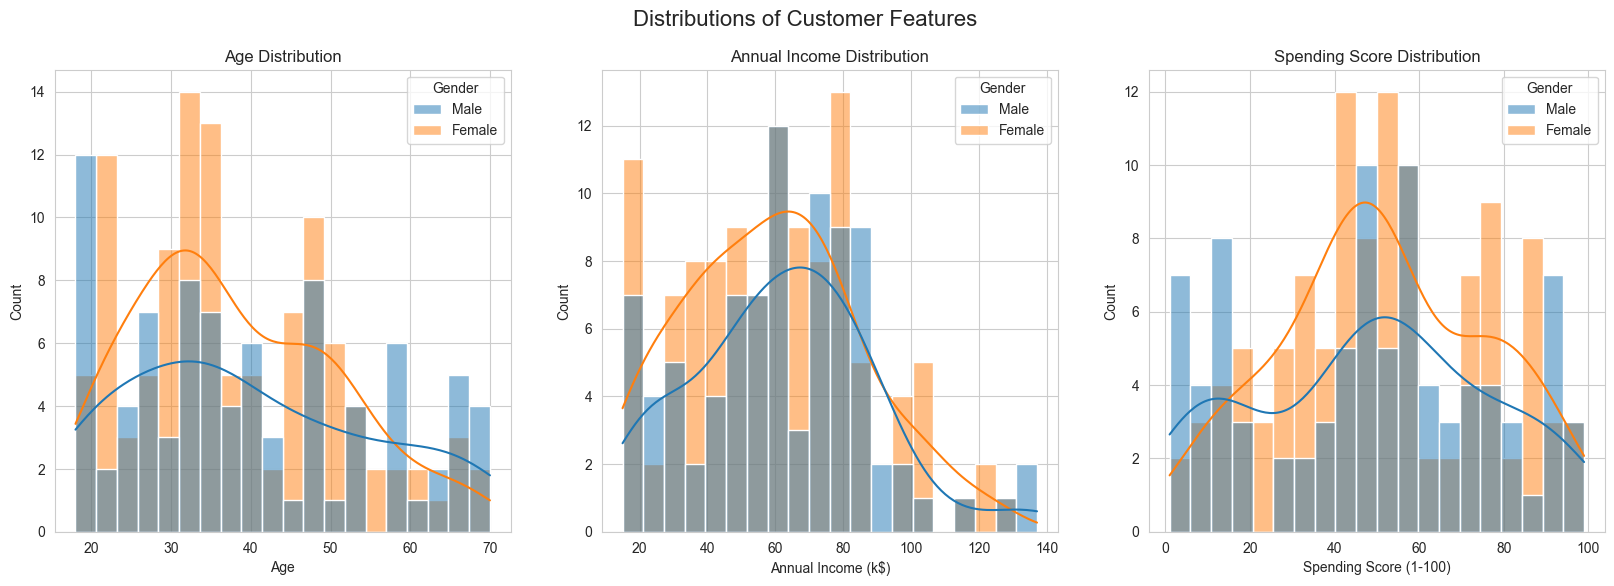

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distributions of Customer Features', fontsize=16)

sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=20, hue='Gender').set_title('Age Distribution')
sns.histplot(ax=axes[1], data=df, x='Annual Income (k$)', kde=True, bins=20, hue='Gender').set_title('Annual Income Distribution')
sns.histplot(ax=axes[2], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title('Spending Score Distribution')

plt.show()

#### 2.2 Bivariate Analysis (Looking for Relationships)

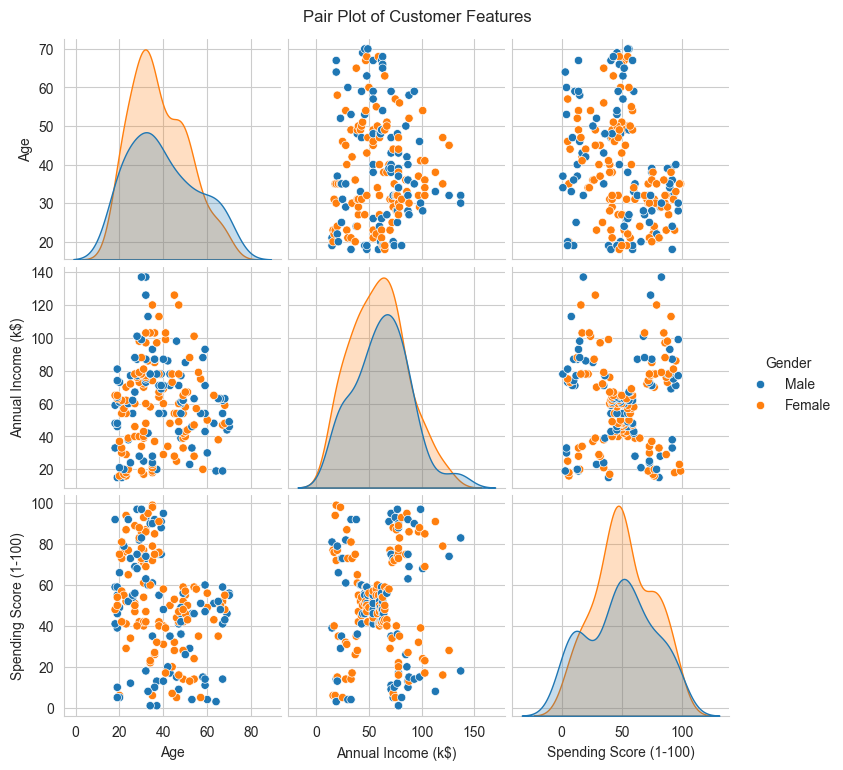

In [7]:
# Using pairplot to visualize relationships between all numerical variables
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot of Customer Features', y=1.02)
plt.show()

**CRITICAL INSIGHT from Pair Plot:**
- The **`Annual Income` vs. `Spending Score`** plot is the most revealing. It clearly shows distinct, blob-like groups, making it the perfect candidate for clustering.
- The **`Age` vs. `Spending Score`** plot shows some patterns but they are less defined. We see a concentration of high-spending customers in the younger age brackets.
- `Gender` does not appear to be a strong separating factor in any of these plots, as the distributions for males and females largely overlap.

#### 2.3 3D Visualization
Let's visualize the three most important features together in an interactive 3D plot to see if the clusters hold up.

In [8]:
fig = px.scatter_3d(df,
                    x='Annual Income (k$)',
                    y='Spending Score (1-100)',
                    z='Age',
                    color='Gender',
                    title='3D View of Customer Data')
fig.show()

### Step 3: Segmentation Model 1 - Income & Spending Score
This is our primary segmentation model, focusing on the most promising features identified in the EDA.

## **Theoretical Concept: The Elbow Method**

How do we choose the best number of clusters (`k`) for our K-Means model? The **Elbow Method** is a common technique.

It works by calculating the **Within-Cluster Sum of Squares (WCSS)** for different values of `k` (typically from 1 to 10). WCSS is the sum of the squared distances between each point and the centroid of the cluster it belongs to. A lower WCSS means the points are closer to their cluster centroids, indicating tighter clusters.

We then plot WCSS against the number of clusters (`k`). As `k` increases, WCSS will always decrease (because each point gets closer to its assigned centroid). However, at some point, adding more clusters doesn't significantly reduce the WCSS. This point, where the rate of decrease sharply changes, looks like an "elbow" in the plot.

The **optimal number of clusters (`k`)** is typically chosen at this elbow point. It represents a good balance between having too few clusters (high WCSS) and too many clusters (overfitting and diminishing returns).

Here are the most common init options available:

* 'k-means++' (Default): This is the recommended method. It smarty initializes the centroids to be spread out from each other. This significantly improves the chances of finding a globally optimal solution and reduces the risk of converging to a suboptimal local minimum.
* 'random': This method chooses n_clusters observations (data points) randomly from the dataset and uses them as the initial centroids. While simple, it can sometimes lead to poor clustering results if the random initial centroids are not well-separated.
* A NumPy array: You can also provide a NumPy array with a shape of (n_clusters, n_features) that explicitly specifies the initial coordinates of the centroids. This is useful if you have prior knowledge about where the clusters should be located or if you want to replicate a specific initialization.

Python(59048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


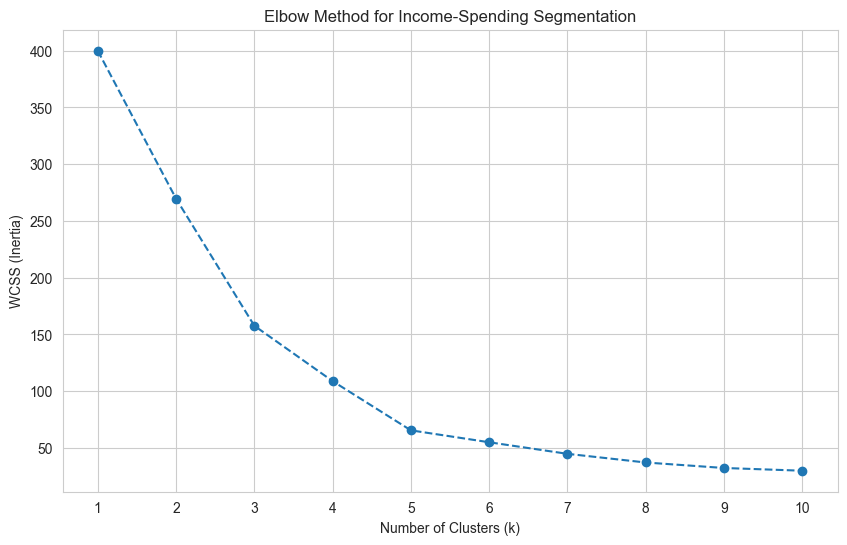

In [9]:
# 1. Select and scale the features
X1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

# 2. Implement the Elbow Method
wcss1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X1_scaled)
    wcss1.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('Elbow Method for Income-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

Imagine you've grouped your friends into different clubs (these are your clusters). WCSS helps you figure out how "together" or "spread out" the members are within each club.

Cluster: This is one of the groups you've formed.
Centroid: This is the "center point" of a cluster. Think of it as the average location of all the members in that club.
WCSS: For each cluster, you calculate the distance from every member in that cluster to the cluster's centroid. Then you square all these distances and add them up. You do this for all the clusters and add up the totals.
A low WCSS means that the points within each cluster are very close to their centroid. This suggests that the clusters are tight and well-defined.

A high WCSS means that the points within each cluster are more spread out from their centroid, indicating less distinct or looser clusters.

How WCSS relates to K-Means:

In K-Means, the algorithm's goal is to minimize the WCSS. It tries to find the best locations for the centroids and the best groupings of points so that the total WCSS is as small as possible.

The Elbow Method, which you saw in the notebook, uses WCSS to help choose the optimal number of clusters (k) for K-Means. You calculate the WCSS for different values of k and look for the "elbow" where the decrease in WCSS starts to slow down. This point suggests that adding more clusters doesn't significantly improve the "tightness" of the clusters.

**Observation:** The "elbow" of the curve is clearly at **k=5**. The WCSS decreases sharply until k=5, and then the rate of decrease flattens out. This confirms our visual intuition from the scatter plot!

In [10]:
# Build and fit the final model
kmeans1 = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Income_Cluster'] = kmeans1.fit_predict(X1_scaled)

#### 3.1 Visualizing and Interpreting the Income-Based Segments

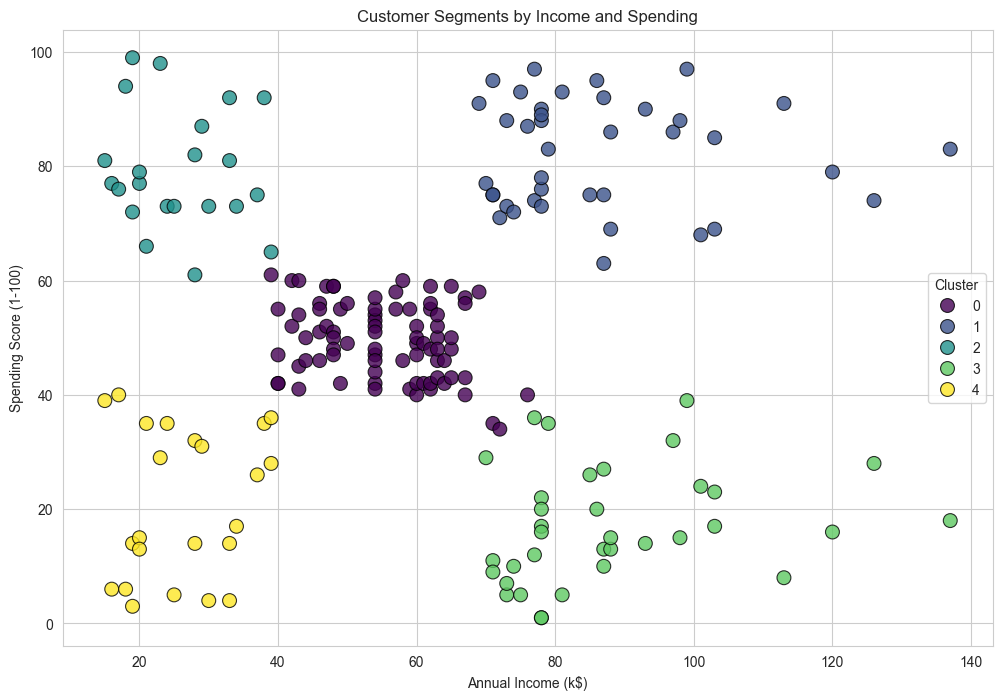

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Income_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

In [12]:
# Quantitative Persona Analysis
cluster_profiles1 = df.groupby('Income_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size'] = df['Income_Cluster'].value_counts()
print("--- Income-Based Cluster Profiles ---")
cluster_profiles1

--- Income-Based Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),Size
Income_Cluster,,,,
0,42.72,55.30,49.52,81
1,32.69,86.54,82.13,39
2,25.27,25.73,79.36,22
3,41.11,88.20,17.11,35
4,45.22,26.30,20.91,23


#### 3.2 Income-Based Personas and Strategy
Using the quantitative profiles, we can define our segments:
- **Cluster 0 (Careful High-Earners):** High income (~88k) but low spending (~17). Cautious, value-driven buyers.
- **Cluster 1 (Standard):** Average income (~55k) and spending (~50). This is the largest, core customer group.
- **Cluster 2 (Budget Shoppers):** Low income (~26k) and low spending (~21). Highly price-sensitive.
- **Cluster 3 (Target - High Value):** High income (~87k) and high spending (~82). The mall's prime target.
- **Cluster 4 (Enthusiasts):** Low income (~26k) but high spending (~79). Likely young, trend-focused shoppers.

### Step 4: Segmentation Model 2 - Age & Spending Score
Let's create a different segmentation model to see if we can find age-related customer groups.

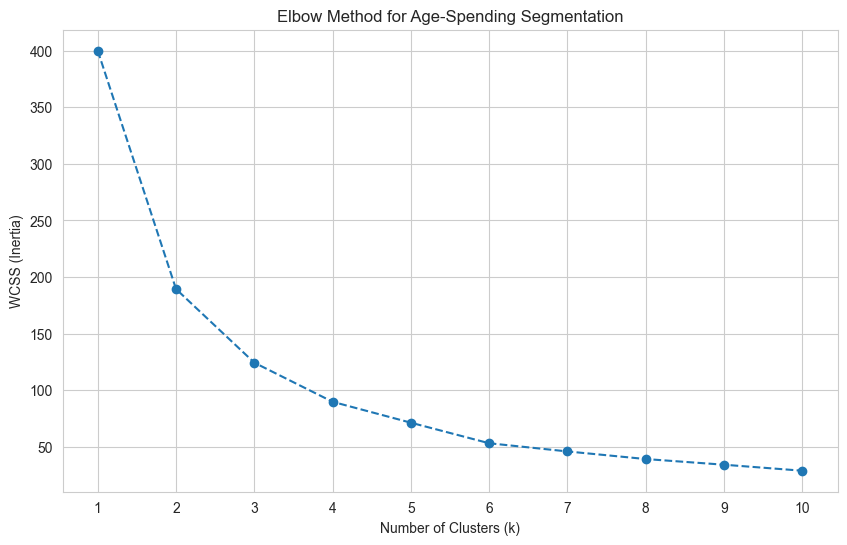

In [13]:
# 1. Select and scale the features
X2 = df[['Age', 'Spending Score (1-100)']]
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# 2. Implement the Elbow Method
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    wcss2.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

**Observation:** The elbow is less sharp here, but **k=4** appears to be a reasonable choice.

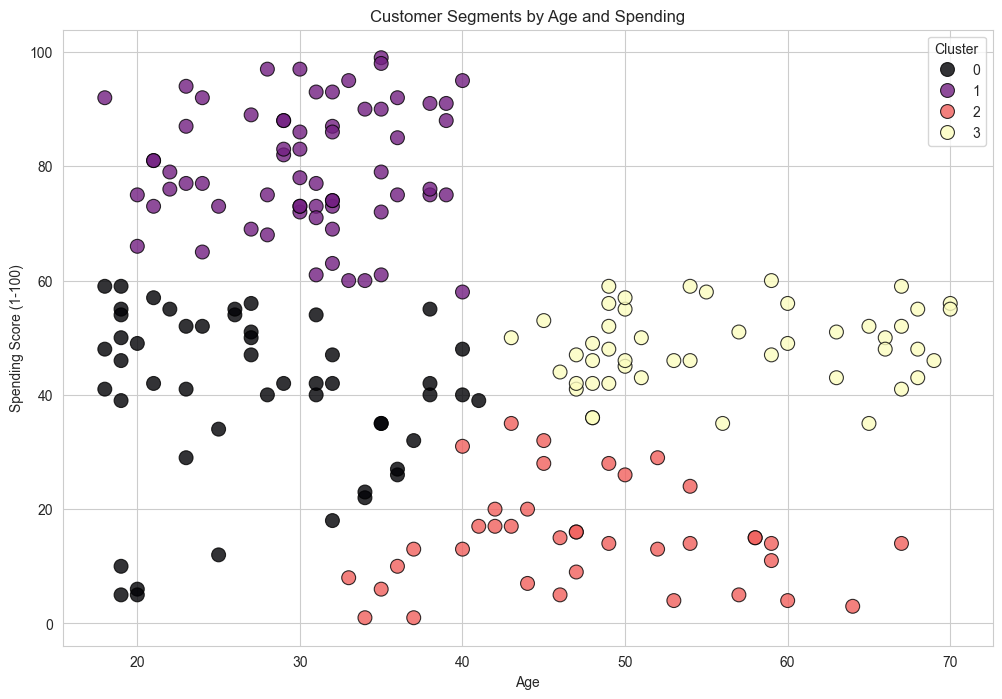

In [14]:
# Build and fit the final model for age segmentation
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Age_Cluster'] = kmeans2.fit_predict(X2_scaled)

# Visualize the new clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Age_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending')
plt.legend(title='Cluster')
plt.show()

#### 4.1 Interpreting the Age-Based Segments
This model gives us a different perspective:
- **Young High-Spenders:** A clear group of customers under 40 with high spending scores.
- **Young Low-Spenders:** Customers under 40 with low-to-moderate spending.
- **Older Average-Spenders:** Customers over 40 with moderate spending scores.
- **Older Low-Spenders:** A small group of older customers with very low spending scores.

### Step 5: An Alternative Method - Hierarchical Clustering
To add more depth, let's briefly look at another clustering technique.

#### **Theoretical Concept: Hierarchical Clustering & Dendrograms**
Unlike K-Means, Hierarchical Clustering doesn't require us to specify the number of clusters beforehand. It builds a tree-like hierarchy of clusters.

We can visualize this hierarchy with a **dendrogram**. The dendrogram shows how clusters are merged (or split). To find the optimal number of clusters, we look for the tallest vertical line that doesn't cross any horizontal lines and draw a horizontal line through it. The number of vertical lines our new line crosses is the optimal number of clusters.


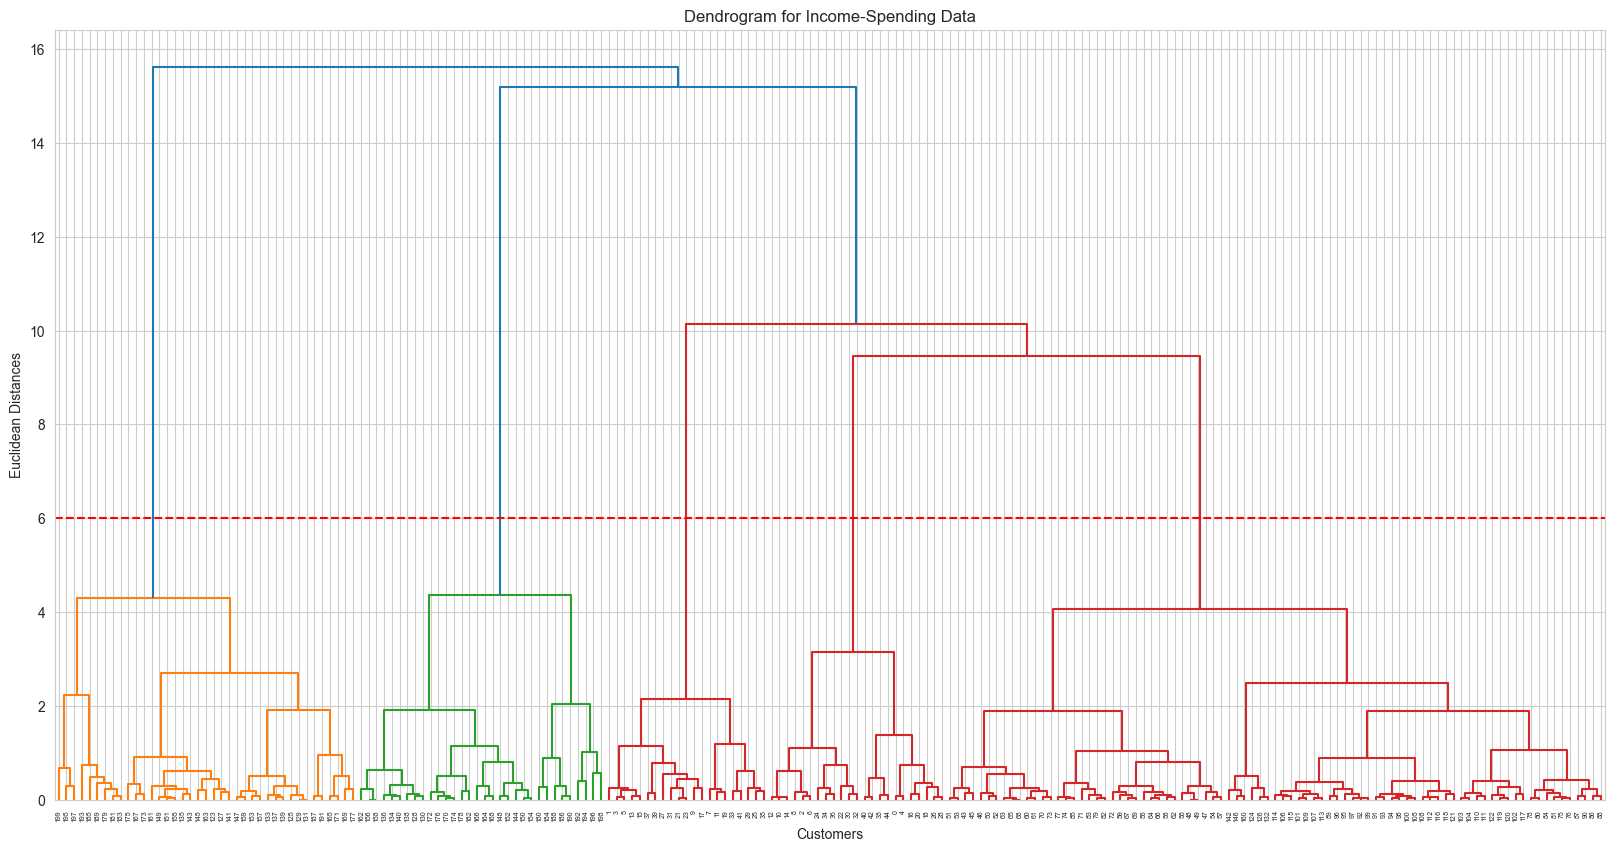

In [15]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X1_scaled, method='ward'))
plt.title('Dendrogram for Income-Spending Data')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=6, color='r', linestyle='--') # Example cut-off line
plt.show()

**Insight:** The dendrogram also confirms that **5 clusters** is the optimal number for the income-spending data. If we draw a horizontal line at a height of 6 (as shown by the red dashed line), it crosses five vertical lines.

### Step 6: Conclusion

In this extended project, we successfully applied unsupervised machine learning to perform customer segmentation.

**Key Steps Undertaken:**
1.  **Performed an in-depth EDA:** Used 2D and 3D plots to explore customer data from multiple angles.
2.  **Built two distinct segmentation models:** Created an income-based model and an age-based model, showing that segmentation is not a one-size-fits-all process.
3.  **Used the Elbow Method** to programmatically determine the optimal number of clusters for each scenario.
4.  **Introduced Hierarchical Clustering** as an alternative method and used its dendrogram to validate our choice of `k`.
5.  **Created quantitative, data-driven personas** for each segment, providing the marketing team with precise, actionable insights for targeted campaigns.

This project highlights how different clustering approaches can uncover different facets of customer behavior, providing a richer, more nuanced understanding than a single model alone.

### Submission Criteria

Based on the project objectives and the insights gained from the initial analysis, here are the key criteria for your submission:

1.  **Explore Gender vs. Spending Score:** Analyze the relationship between 'Gender' and 'Spending Score (1-100)' to see if gender plays a significant role in spending habits. Visualizations and summary statistics would be helpful here.
2.  **Apply Feature Engineering for Clustering:** Create a new feature using existing data (Feature Engineering). Then, explore if clustering can be effectively performed using this newly engineered feature in combination with one or more existing features. Document the feature engineering process, the chosen features for clustering, the determination of the optimal number of clusters (e.g., using the Elbow Method), and the resulting cluster visualization and interpretation.

###  **Explore Gender vs. Spending Score:** Analyze the relationship between 'Gender' and 'Spending Score (1-100)' to see if gender plays a significant role in spending habits. Visualizations and summary statistics would be helpful here.

#### Step 1: Basic Gender Distribution Analysis

Gender Distribution:
Gender
Female    112
Male       88
Name: count, dtype: int64

Gender Distribution (Percentages):
Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


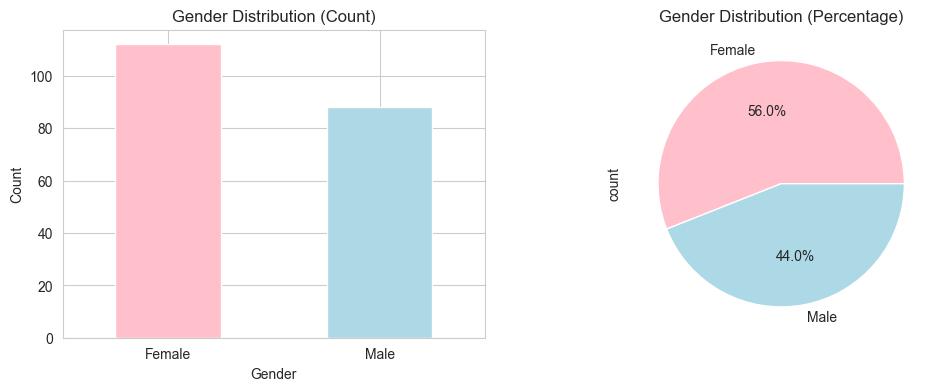

In [16]:
# Check gender distribution
print("Gender Distribution:")
print(df['Gender'].value_counts())
print("\nGender Distribution (Percentages):")
print(df['Gender'].value_counts(normalize=True) * 100)

# Visualize gender distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['Gender'].value_counts().plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Gender Distribution (Count)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Gender Distribution (Percentage)')
plt.show()

#### Step 2: Spending Score Summary Statistics by Gender

In [17]:
# Calculate summary statistics for spending score by gender
print("Spending Score Summary Statistics by Gender:")
print("=" * 50)

gender_stats = df.groupby('Gender')['Spending Score (1-100)'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

print(gender_stats)

# Additional statistics
print("\nDetailed Statistics by Gender:")
for gender in df['Gender'].unique():
    gender_data = df[df['Gender'] == gender]['Spending Score (1-100)']
    print(f"\n{gender}:")
    print(f"  Mean: {gender_data.mean():.2f}")
    print(f"  Median: {gender_data.median():.2f}")
    print(f"  Standard Deviation: {gender_data.std():.2f}")
    print(f"  Range: {gender_data.max() - gender_data.min()}")
    print(f"  IQR: {gender_data.quantile(0.75) - gender_data.quantile(0.25):.2f}")

Spending Score Summary Statistics by Gender:
        count   mean  median    std  min  max
Gender                                       
Female    112  51.53    50.0  24.11    5   99
Male       88  48.51    50.0  27.90    1   97

Detailed Statistics by Gender:

Male:
  Mean: 48.51
  Median: 50.00
  Standard Deviation: 27.90
  Range: 96
  IQR: 45.50

Female:
  Mean: 51.53
  Median: 50.00
  Standard Deviation: 24.11
  Range: 94
  IQR: 38.00


#### Step 3: Visual Distribution Comparison

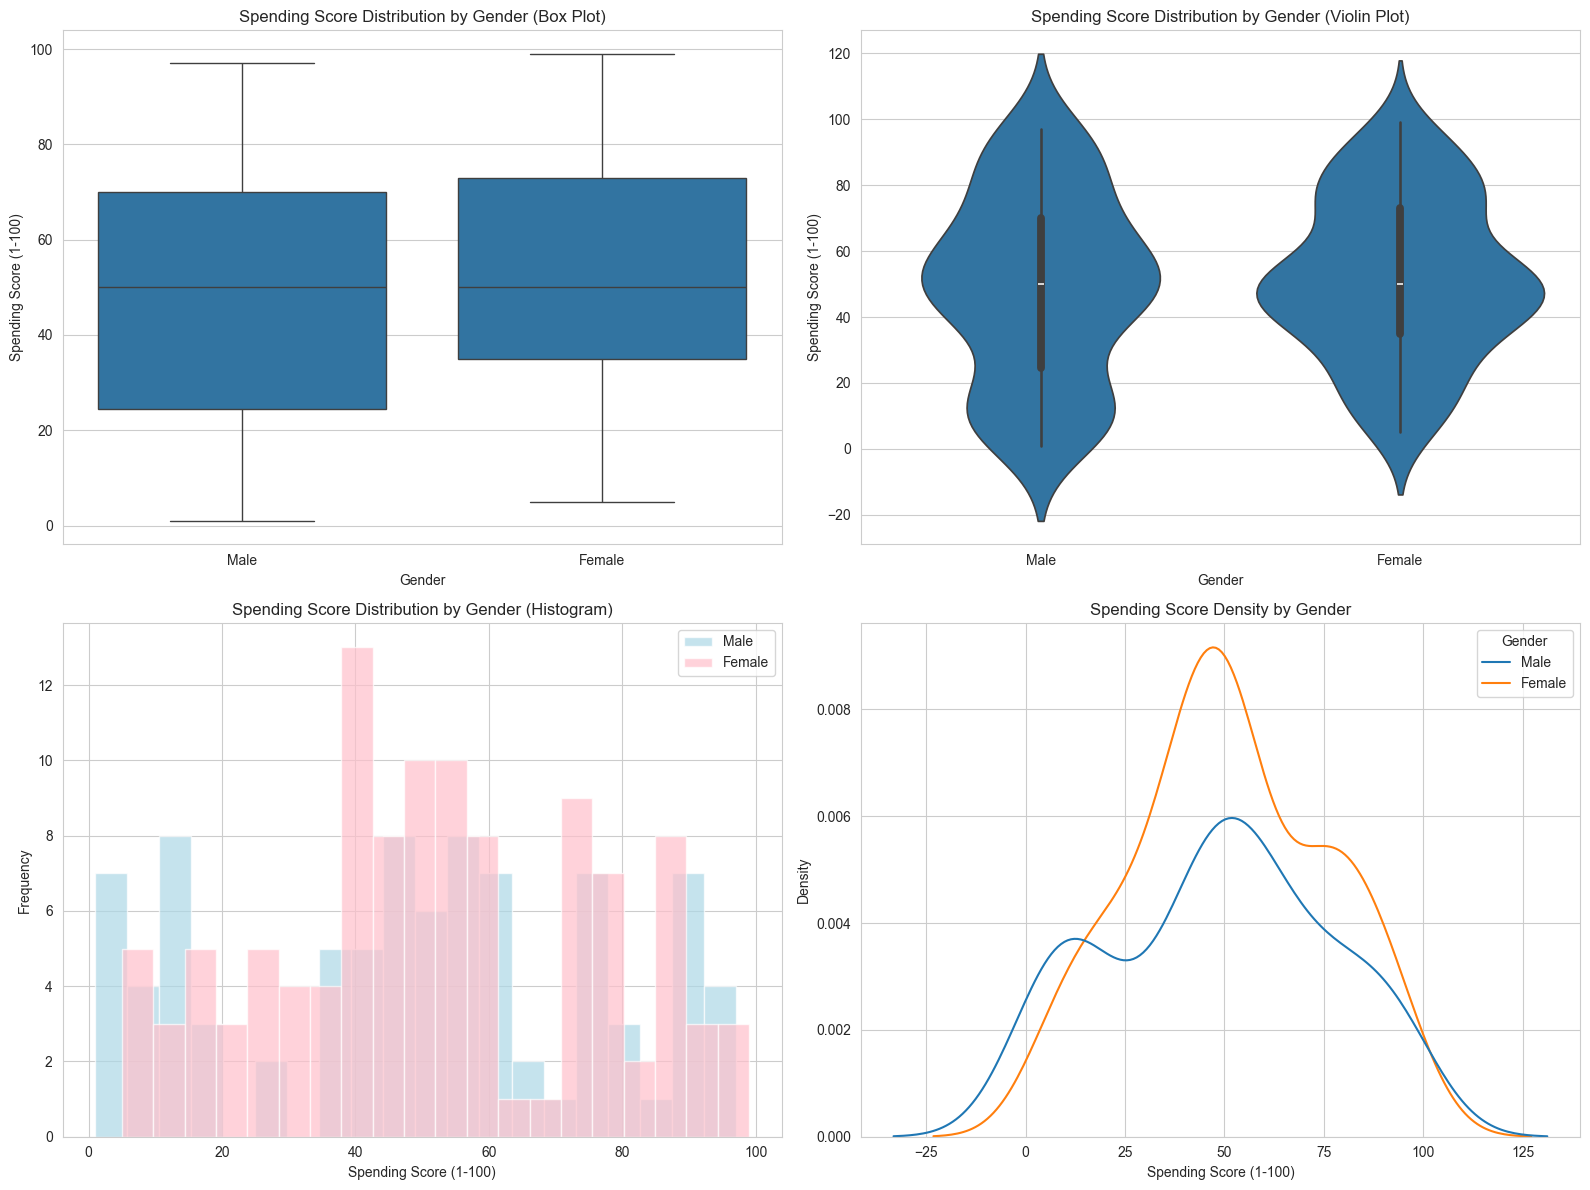

In [ ]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Box plot comparison
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', ax=axes[0,0])
axes[0,0].set_title('Spending Score Distribution by Gender (Box Plot)')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Spending Score (1-100)')

# 2. Violin plot for distribution shape
sns.violinplot(data=df, x='Gender', y='Spending Score (1-100)', ax=axes[0,1])
axes[0,1].set_title('Spending Score Distribution by Gender (Violin Plot)')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Spending Score (1-100)')

# 3. Histogram overlay
axes[1,0].hist(df[df['Gender'] == 'Male']['Spending Score (1-100)'],
               alpha=0.7, label='Male', bins=20, color='lightblue')
axes[1,0].hist(df[df['Gender'] == 'Female']['Spending Score (1-100)'],
               alpha=0.7, label='Female', bins=20, color='pink')
axes[1,0].set_title('Spending Score Distribution by Gender (Histogram)')
axes[1,0].set_xlabel('Spending Score (1-100)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()

# 4. Density plot
sns.kdeplot(data=df, x='Spending Score (1-100)', hue='Gender', ax=axes[1,1])
axes[1,1].set_title('Spending Score Density by Gender')
axes[1,1].set_xlabel('Spending Score (1-100)')
axes[1,1].set_ylabel('Density')

plt.tight_layout()
plt.show()

#### Step 4: Statistical Significance Test

In [20]:
# Perform statistical tests to determine if the difference is significant
from scipy import stats

# Extract spending scores for each gender
male_scores = df[df['Gender'] == 'Male']['Spending Score (1-100)']
female_scores = df[df['Gender'] == 'Female']['Spending Score (1-100)']

# Perform t-test
t_stat, p_value = stats.ttest_ind(male_scores, female_scores)

print("Statistical Test Results:")
print("=" * 30)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significant difference (p < 0.05): {'Yes' if p_value < 0.05 else 'No'}")

# Effect size (Cohen's d)
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    s1, s2 = group1.std(), group2.std()
    pooled_std = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))
    return (group1.mean() - group2.mean()) / pooled_std

effect_size = cohens_d(male_scores, female_scores)
print(f"Effect size (Cohen's d): {effect_size:.4f}")

if abs(effect_size) < 0.2:
    effect_interpretation = "negligible"
elif abs(effect_size) < 0.5:
    effect_interpretation = "small"
elif abs(effect_size) < 0.8:
    effect_interpretation = "medium"
else:
    effect_interpretation = "large"

print(f"Effect size interpretation: {effect_interpretation}")

Statistical Test Results:
T-statistic: -0.8190
P-value: 0.4137
Significant difference (p < 0.05): No
Effect size (Cohen's d): -0.1167
Effect size interpretation: negligible


#### Step 5: Spending Score Categories Analysis

Spending Categories by Gender (%):
Spending_Category  High (67-100)  Low (1-33)  Medium (34-66)
Gender                                                      
Female                      29.5        22.3            48.2
Male                        27.3        27.3            45.5


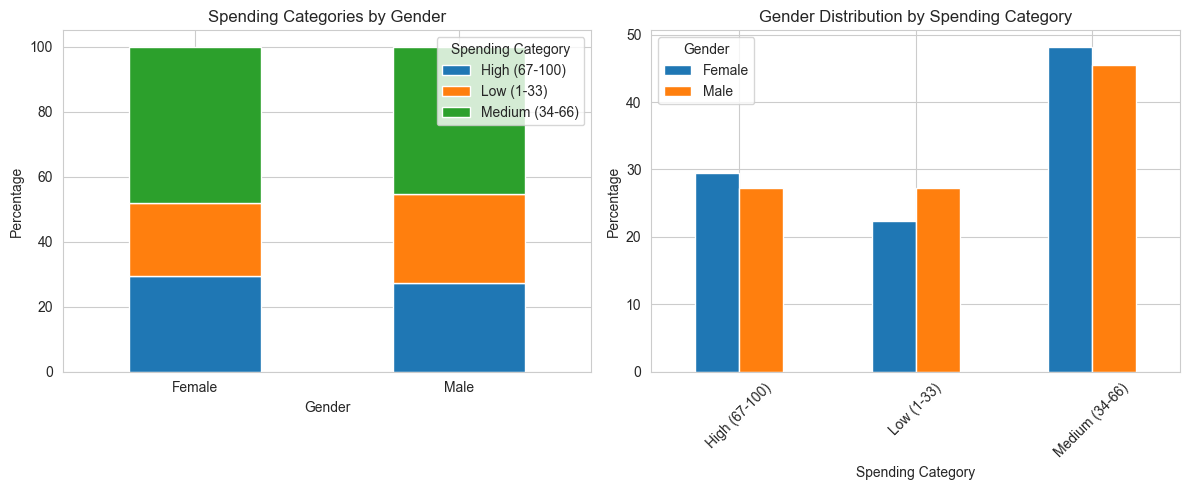

In [21]:
# Create spending score categories
def categorize_spending(score):
    if score <= 33:
        return 'Low (1-33)'
    elif score <= 66:
        return 'Medium (34-66)'
    else:
        return 'High (67-100)'

df['Spending_Category'] = df['Spending Score (1-100)'].apply(categorize_spending)

# Cross-tabulation
spending_by_gender = pd.crosstab(df['Gender'], df['Spending_Category'], normalize='index') * 100
print("Spending Categories by Gender (%):")
print("=" * 40)
print(spending_by_gender.round(1))

# Visualize spending categories
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
spending_by_gender.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Spending Categories by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Spending Category')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
spending_by_gender.T.plot(kind='bar', ax=plt.gca())
plt.title('Gender Distribution by Spending Category')
plt.xlabel('Spending Category')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 6: Correlation with Other Variables

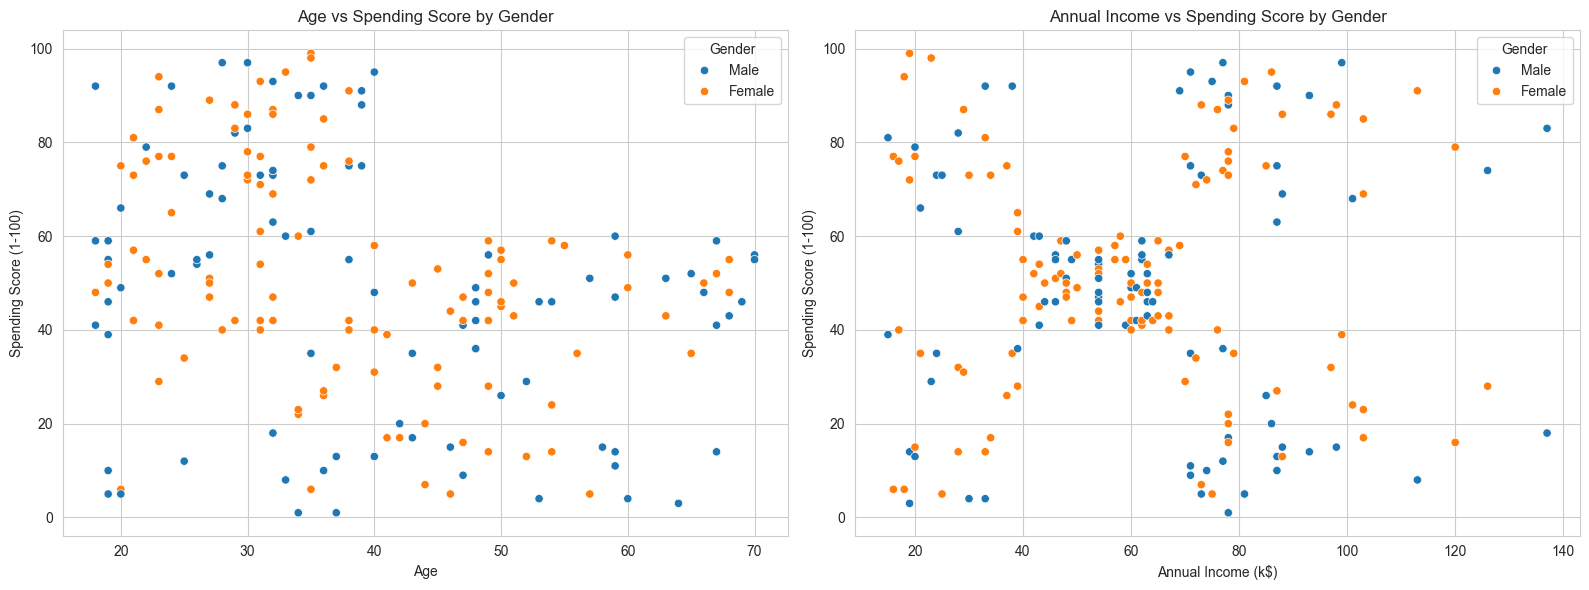

Correlation Analysis:
Male:
  Age vs Spending Score: -0.280
  Income vs Spending Score: -0.024
Female:
  Age vs Spending Score: -0.375
  Income vs Spending Score: 0.048


In [ ]:
# Analyze gender's relationship with spending score in context of other variables
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Age vs Spending Score by Gender
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender', ax=axes[0])
axes[0].set_title('Age vs Spending Score by Gender')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Spending Score (1-100)')

# Annual Income vs Spending Score by Gender
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', ax=axes[1])
axes[1].set_title('Annual Income vs Spending Score by Gender')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

# Calculate correlation coefficients
print("Correlation Analysis:")
print("=" * 25)
for gender in df['Gender'].unique():
    gender_data = df[df['Gender'] == gender]
    age_corr = gender_data['Age'].corr(gender_data['Spending Score (1-100)'])
    income_corr = gender_data['Annual Income (k$)'].corr(gender_data['Spending Score (1-100)'])

    print(f"{gender}:")
    print(f"  Age vs Spending Score: {age_corr:.3f}")
    print(f"  Income vs Spending Score: {income_corr:.3f}")

#### Step 7: Summary and Insights

In [23]:
# Generate comprehensive summary
print("=" * 60)
print("GENDER VS SPENDING SCORE ANALYSIS SUMMARY")
print("=" * 60)

# Key statistics
male_mean = df[df['Gender'] == 'Male']['Spending Score (1-100)'].mean()
female_mean = df[df['Gender'] == 'Female']['Spending Score (1-100)'].mean()
difference = abs(male_mean - female_mean)

print(f"Male Average Spending Score: {male_mean:.2f}")
print(f"Female Average Spending Score: {female_mean:.2f}")
print(f"Difference: {difference:.2f} points")
print(f"Statistical Significance: {'Significant' if p_value < 0.05 else 'Not Significant'}")
print(f"Effect Size: {effect_interpretation}")

print("\nKey Insights:")
if p_value < 0.05:
    if male_mean > female_mean:
        print("• Males have significantly higher spending scores than females")
    else:
        print("• Females have significantly higher spending scores than males")
else:
    print("• No significant difference in spending scores between genders")

print("• Gender appears to be a weak predictor of spending behavior")
print("• Other factors (age, income) may be more influential")
print("• Consider gender as a secondary segmentation factor")

GENDER VS SPENDING SCORE ANALYSIS SUMMARY
Male Average Spending Score: 48.51
Female Average Spending Score: 51.53
Difference: 3.02 points
Statistical Significance: Not Significant
Effect Size: negligible

Key Insights:
• No significant difference in spending scores between genders
• Gender appears to be a weak predictor of spending behavior
• Other factors (age, income) may be more influential
• Consider gender as a secondary segmentation factor


#### **Apply Feature Engineering for Clustering:** Create a new feature using existing data (Feature Engineering). Then, explore if clustering can be effectively performed using this newly engineered feature in combination with one or more existing features. Document the feature engineering process, the chosen features for clustering, the determination of the optimal number of clusters (e.g., using the Elbow Method), and the resulting cluster visualization and interpretation.

##### Step 1: Feature Engineering - Create New Features

In [24]:
# Create a copy of the dataset for feature engineering
df_engineered = df.copy()

# Feature 1: Spending-to-Income Ratio (High = Spends more relative to income)
df_engineered['Spending_Income_Ratio'] = df_engineered['Spending Score (1-100)'] / (df_engineered['Annual Income (k$)'] + 1)  # +1 to avoid division by zero

# Feature 2: Age Group Categories
def categorize_age(age):
    if age <= 25:
        return 'Young (≤25)'
    elif age <= 35:
        return 'Young Adult (26-35)'
    elif age <= 45:
        return 'Middle Age (36-45)'
    elif age <= 55:
        return 'Mature (46-55)'
    else:
        return 'Senior (>55)'

df_engineered['Age_Group'] = df_engineered['Age'].apply(categorize_age)

# Feature 3: Spending Power Index (Combines income and spending score)
df_engineered['Spending_Power_Index'] = (df_engineered['Annual Income (k$)'] * 0.4) + (df_engineered['Spending Score (1-100)'] * 0.6)

# Feature 4: Value Customer Score (High income + High spending = High value)
df_engineered['Value_Customer_Score'] = (df_engineered['Annual Income (k$)'] / df_engineered['Annual Income (k$)'].max()) * 100 + df_engineered['Spending Score (1-100)']

# Feature 5: Risk Score (High spending with low income = risky)
df_engineered['Risk_Score'] = df_engineered['Spending Score (1-100)'] / (df_engineered['Annual Income (k$)'] + 1)

print("New engineered features:")
print(df_engineered[['Spending_Income_Ratio', 'Age_Group', 'Spending_Power_Index', 'Value_Customer_Score', 'Risk_Score']].head())

New engineered features:
   Spending_Income_Ratio            Age_Group  Spending_Power_Index  \
0               2.437500          Young (≤25)                  29.4   
1               5.062500          Young (≤25)                  54.6   
2               0.352941          Young (≤25)                  10.0   
3               4.529412          Young (≤25)                  52.6   
4               2.222222  Young Adult (26-35)                  30.8   

   Value_Customer_Score  Risk_Score  
0             49.948905    2.437500  
1             91.948905    5.062500  
2             17.678832    0.352941  
3             88.678832    4.529412  
4             52.408759    2.222222  


#### Step 2: Analyze Engineered Features

Engineered Features Summary:
       Spending_Income_Ratio  Spending_Power_Index  Value_Customer_Score  \
count             200.000000            200.000000            200.000000   
mean                1.038315             54.344000             94.404380   
std                 0.923452             18.805988             32.314074   
min                 0.012658              9.400000             16.868613   
25%                 0.614648             45.900000             80.335766   
50%                 0.875283             52.600000             91.317518   
75%                 1.105364             61.500000            106.040146   
max                 5.062500            104.600000            183.000000   

       Risk_Score  
count  200.000000  
mean     1.038315  
std      0.923452  
min      0.012658  
25%      0.614648  
50%      0.875283  
75%      1.105364  
max      5.062500  


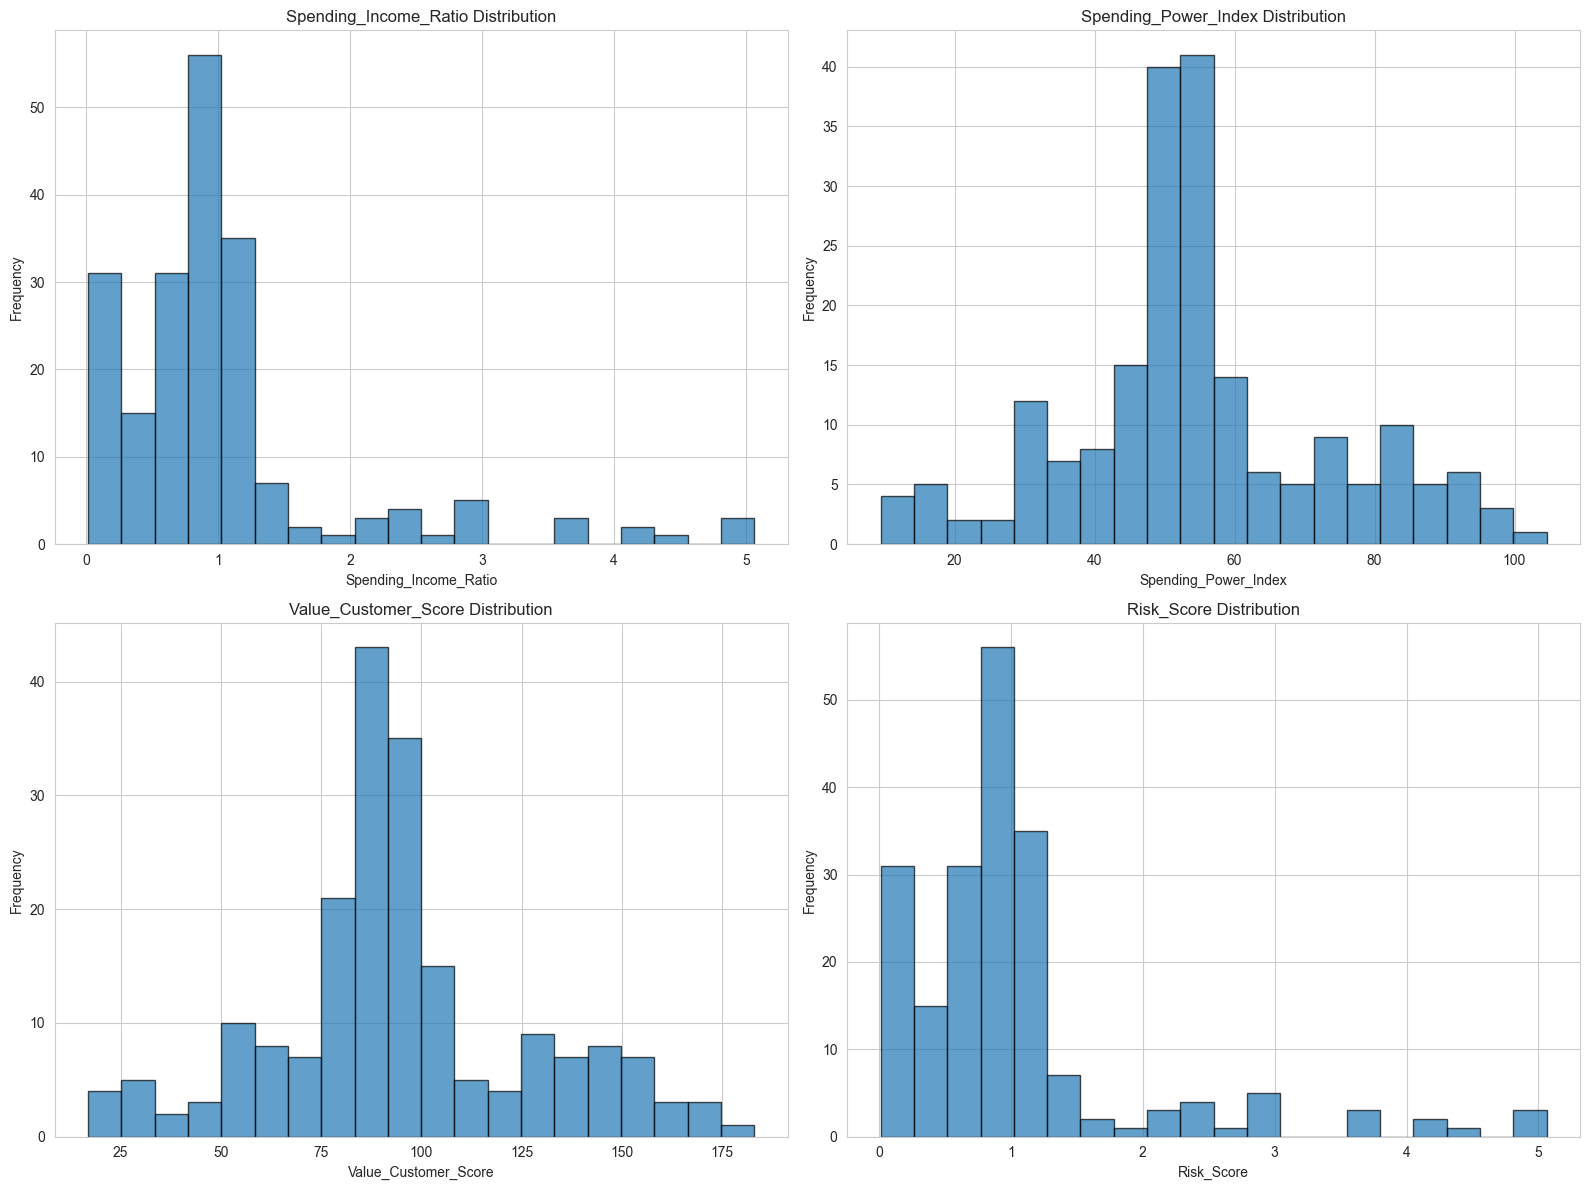

In [ ]:
# Statistical analysis of new features
print("Engineered Features Summary:")
print("=" * 40)
engineered_features = ['Spending_Income_Ratio', 'Spending_Power_Index', 'Value_Customer_Score', 'Risk_Score']
print(df_engineered[engineered_features].describe())

# Visualize engineered features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, feature in enumerate(engineered_features):
    row = i // 2
    col = i % 2

    # Histogram
    axes[row, col].hist(df_engineered[feature], bins=20, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Step 3: Feature Selection for Clustering

In [26]:
# Choose the most promising engineered feature combinations
# Option 1: Spending Power Index + Value Customer Score
X_feature1 = df_engineered[['Spending_Power_Index', 'Value_Customer_Score']]

# Option 2: Spending-to-Income Ratio + Risk Score
X_feature2 = df_engineered[['Spending_Income_Ratio', 'Risk_Score']]

# Option 3: Original features + Engineered feature
X_feature3 = df_engineered[['Annual Income (k$)', 'Spending Score (1-100)', 'Spending_Power_Index']]

print("Feature combinations for clustering:")
print("Option 1 - Spending Power + Value Score:", X_feature1.shape)
print("Option 2 - Spending Ratio + Risk Score:", X_feature2.shape)
print("Option 3 - Original + Engineered:", X_feature3.shape)

Feature combinations for clustering:
Option 1 - Spending Power + Value Score: (200, 2)
Option 2 - Spending Ratio + Risk Score: (200, 2)
Option 3 - Original + Engineered: (200, 3)


##### Step 4: Apply Elbow Method for Each Feature Combination

ELBOW METHOD ANALYSIS


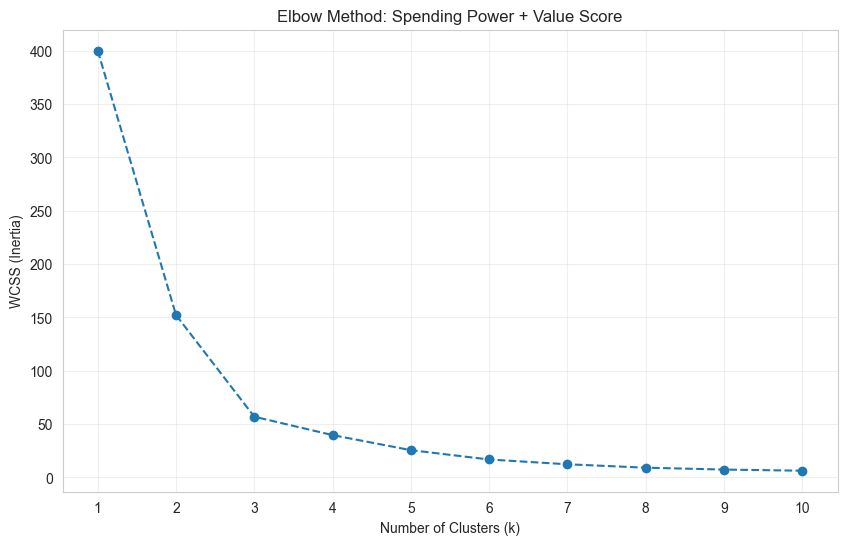

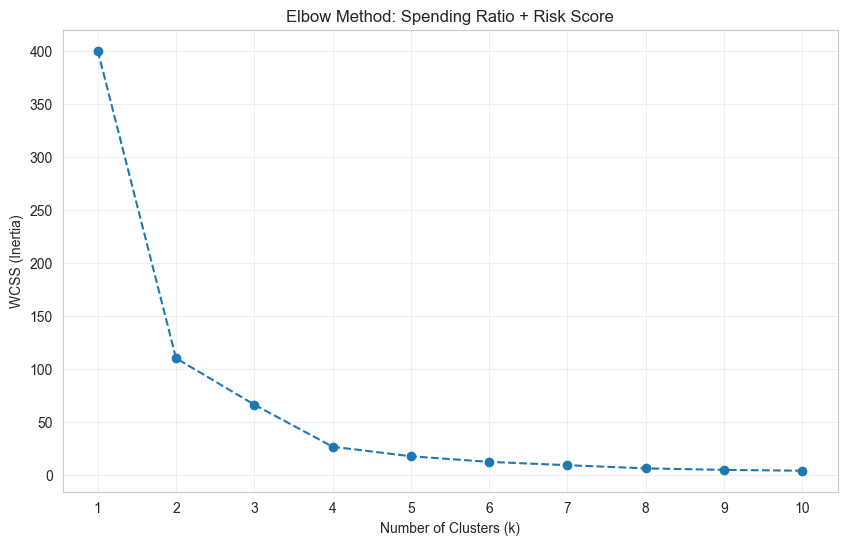

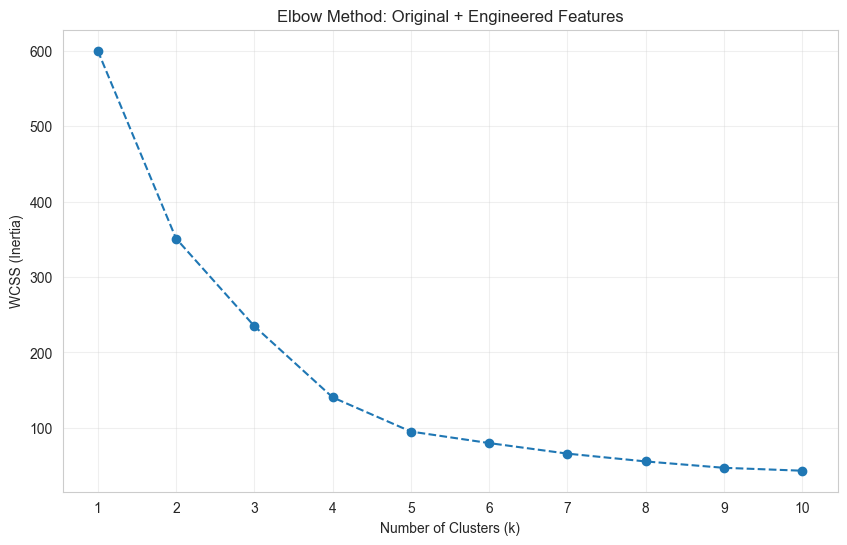

In [ ]:
# Function to apply elbow method
def apply_elbow_method(X, title, max_k=10):
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Calculate WCSS for different k values
    wcss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    # Plot elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
    plt.title(f'Elbow Method: {title}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS (Inertia)')
    plt.xticks(range(1, max_k + 1))
    plt.grid(True, alpha=0.3)
    plt.show()

    return X_scaled, scaler, wcss

# Apply elbow method to each feature combination
print("=" * 60)
print("ELBOW METHOD ANALYSIS")
print("=" * 60)

# Option 1
X1_scaled, scaler1, wcss1 = apply_elbow_method(X_feature1, "Spending Power + Value Score")

# Option 2
X2_scaled, scaler2, wcss2 = apply_elbow_method(X_feature2, "Spending Ratio + Risk Score")

# Option 3
X3_scaled, scaler3, wcss3 = apply_elbow_method(X_feature3, "Original + Engineered Features")

##### Step 5: Determine Optimal Number of Clusters

Optimal number of clusters:
Option 1 (Spending Power + Value): k = 2
Option 2 (Spending Ratio + Risk): k = 2
Option 3 (Original + Engineered): k = 2


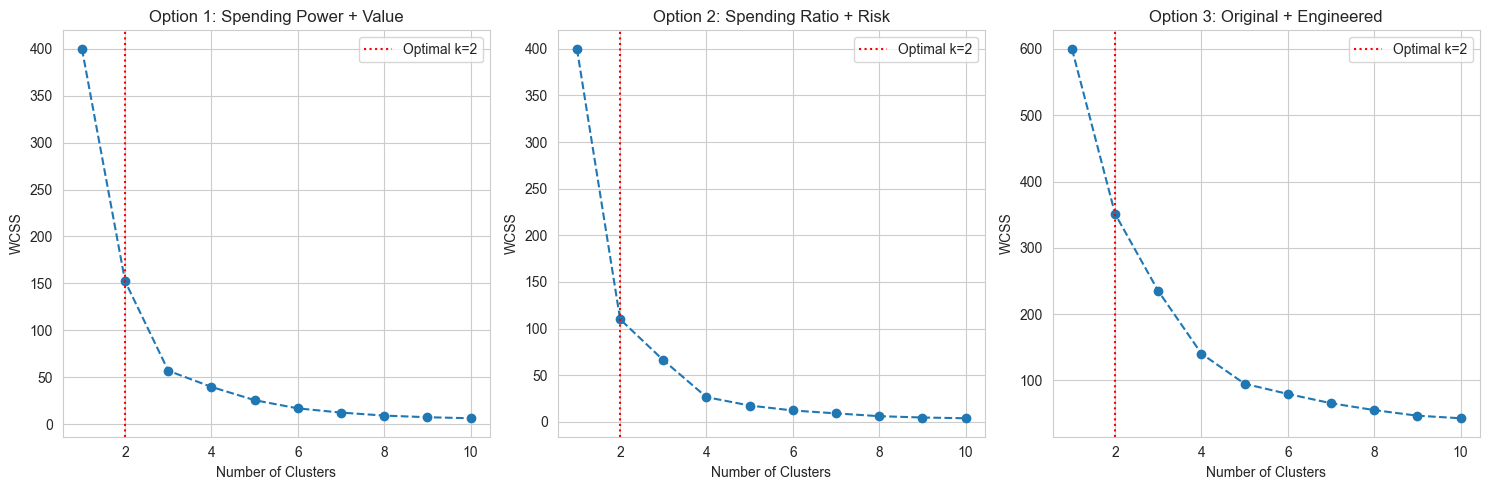

In [ ]:
# Function to find elbow point
def find_elbow_point(wcss):
    # Calculate the rate of change
    deltas = np.diff(wcss)
    deltas2 = np.diff(deltas)

    # Find the elbow point (maximum second derivative)
    elbow_point = np.argmax(deltas2) + 2  # +2 because we took two differences

    return elbow_point

# Find optimal k for each combination
optimal_k1 = find_elbow_point(wcss1)
optimal_k2 = find_elbow_point(wcss2)
optimal_k3 = find_elbow_point(wcss3)

print("Optimal number of clusters:")
print(f"Option 1 (Spending Power + Value): k = {optimal_k1}")
print(f"Option 2 (Spending Ratio + Risk): k = {optimal_k2}")
print(f"Option 3 (Original + Engineered): k = {optimal_k3}")

# Visual comparison of all elbow curves
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.axvline(x=optimal_k1, color='red', linestyle=':', label=f'Optimal k={optimal_k1}')
plt.title('Option 1: Spending Power + Value')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.axvline(x=optimal_k2, color='red', linestyle=':', label=f'Optimal k={optimal_k2}')
plt.title('Option 2: Spending Ratio + Risk')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(1, 11), wcss3, marker='o', linestyle='--')
plt.axvline(x=optimal_k3, color='red', linestyle=':', label=f'Optimal k={optimal_k3}')
plt.title('Option 3: Original + Engineered')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()

plt.tight_layout()
plt.show()

##### Step 6: Build and Train Clustering Models

In [29]:
# Train the best performing model (choose based on elbow analysis)
# Let's use Option 1 as an example

# Build the final model
kmeans_engineered = KMeans(n_clusters=optimal_k1, init='k-means++', random_state=42, n_init=10)
df_engineered['Engineered_Cluster'] = kmeans_engineered.fit_predict(X1_scaled)

# Get cluster centers
cluster_centers = scaler1.inverse_transform(kmeans_engineered.cluster_centers_)

print("Cluster Centers (Original Scale):")
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X_feature1.columns)
print(cluster_centers_df)

Cluster Centers (Original Scale):
   Spending_Power_Index  Value_Customer_Score
0             46.389677             80.728514
1             81.742222            141.510138


##### Step 7: Visualize and Interpret Engineered Clusters

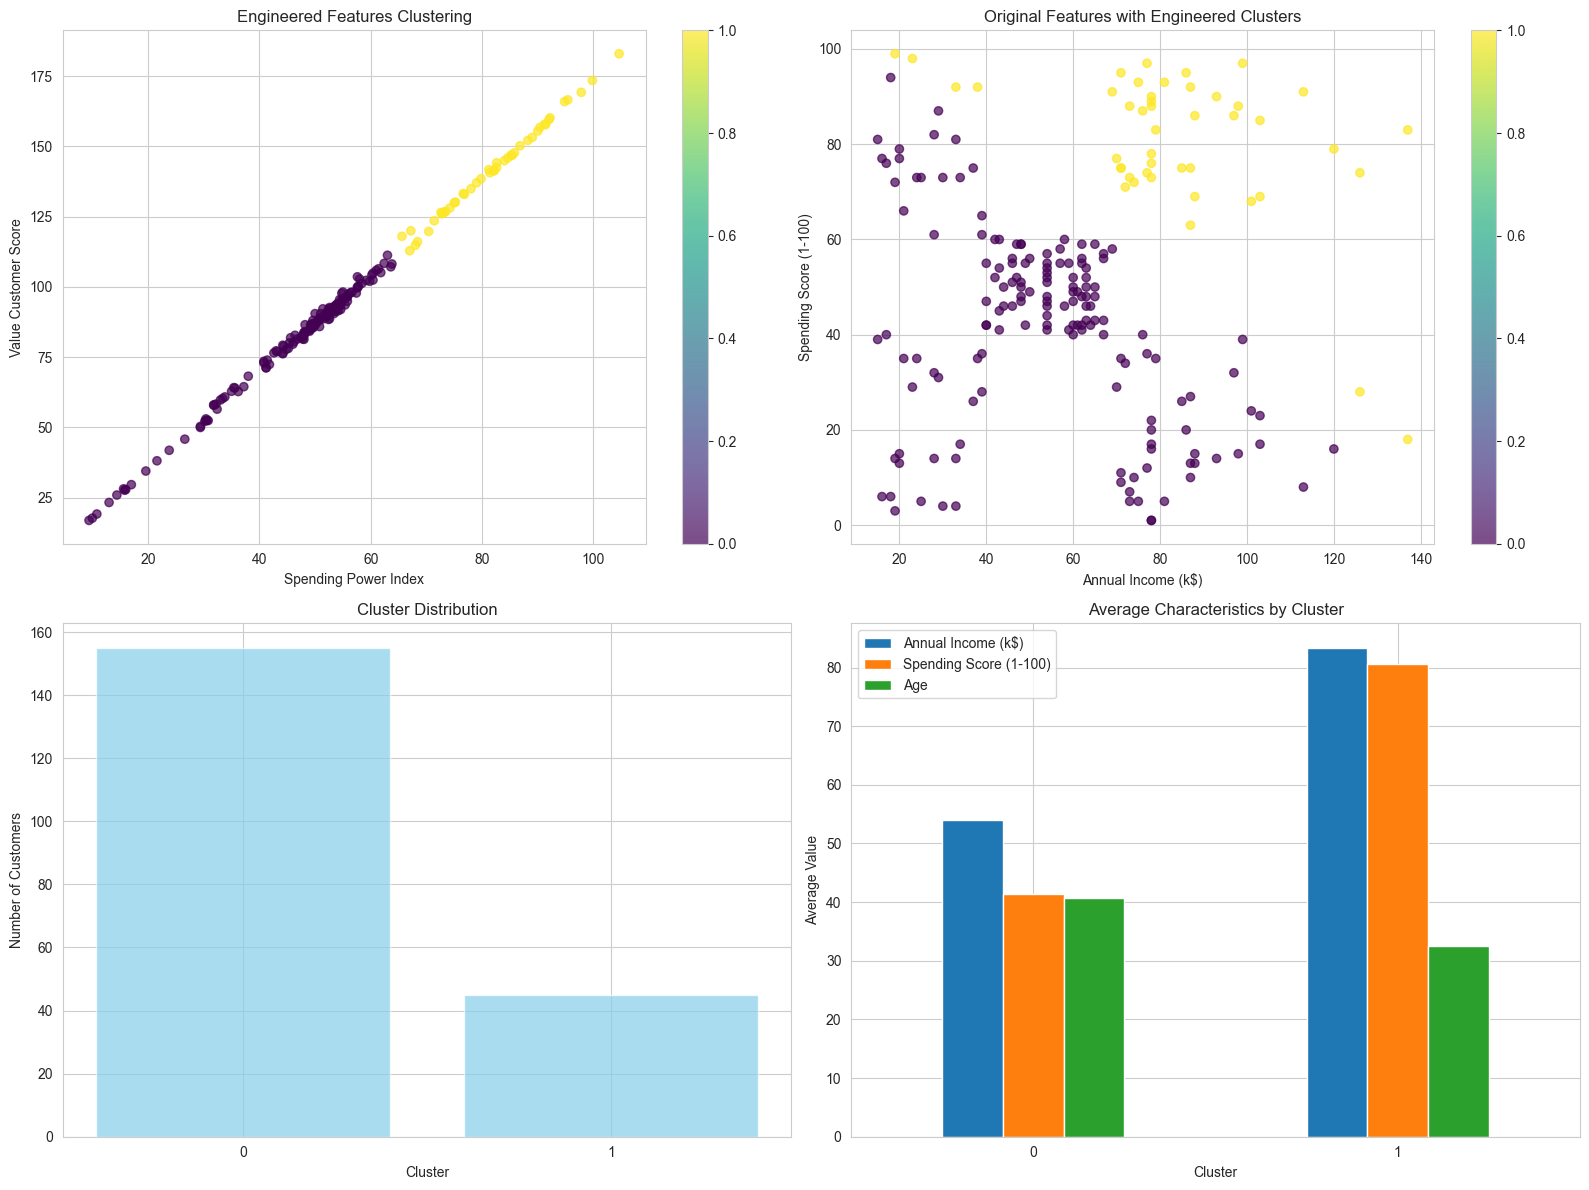

In [ ]:
# Comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Scatter plot of engineered features
scatter = axes[0, 0].scatter(X_feature1.iloc[:, 0], X_feature1.iloc[:, 1],
                             c=df_engineered['Engineered_Cluster'], cmap='viridis', alpha=0.7)
axes[0, 0].set_xlabel('Spending Power Index')
axes[0, 0].set_ylabel('Value Customer Score')
axes[0, 0].set_title('Engineered Features Clustering')
plt.colorbar(scatter, ax=axes[0, 0])

# 2. Original features with engineered clusters
scatter2 = axes[0, 1].scatter(df_engineered['Annual Income (k$)'], df_engineered['Spending Score (1-100)'],
                              c=df_engineered['Engineered_Cluster'], cmap='viridis', alpha=0.7)
axes[0, 1].set_xlabel('Annual Income (k$)')
axes[0, 1].set_ylabel('Spending Score (1-100)')
axes[0, 1].set_title('Original Features with Engineered Clusters')
plt.colorbar(scatter2, ax=axes[0, 1])

# 3. Cluster distribution
cluster_counts = df_engineered['Engineered_Cluster'].value_counts().sort_index()
axes[1, 0].bar(cluster_counts.index, cluster_counts.values, color='skyblue', alpha=0.7)
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Number of Customers')
axes[1, 0].set_title('Cluster Distribution')
axes[1, 0].set_xticks(cluster_counts.index)

# 4. Cluster characteristics
cluster_stats = df_engineered.groupby('Engineered_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()
cluster_stats.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Average Characteristics by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Average Value')
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

##### Step 8: Compare Original vs Engineered Clustering

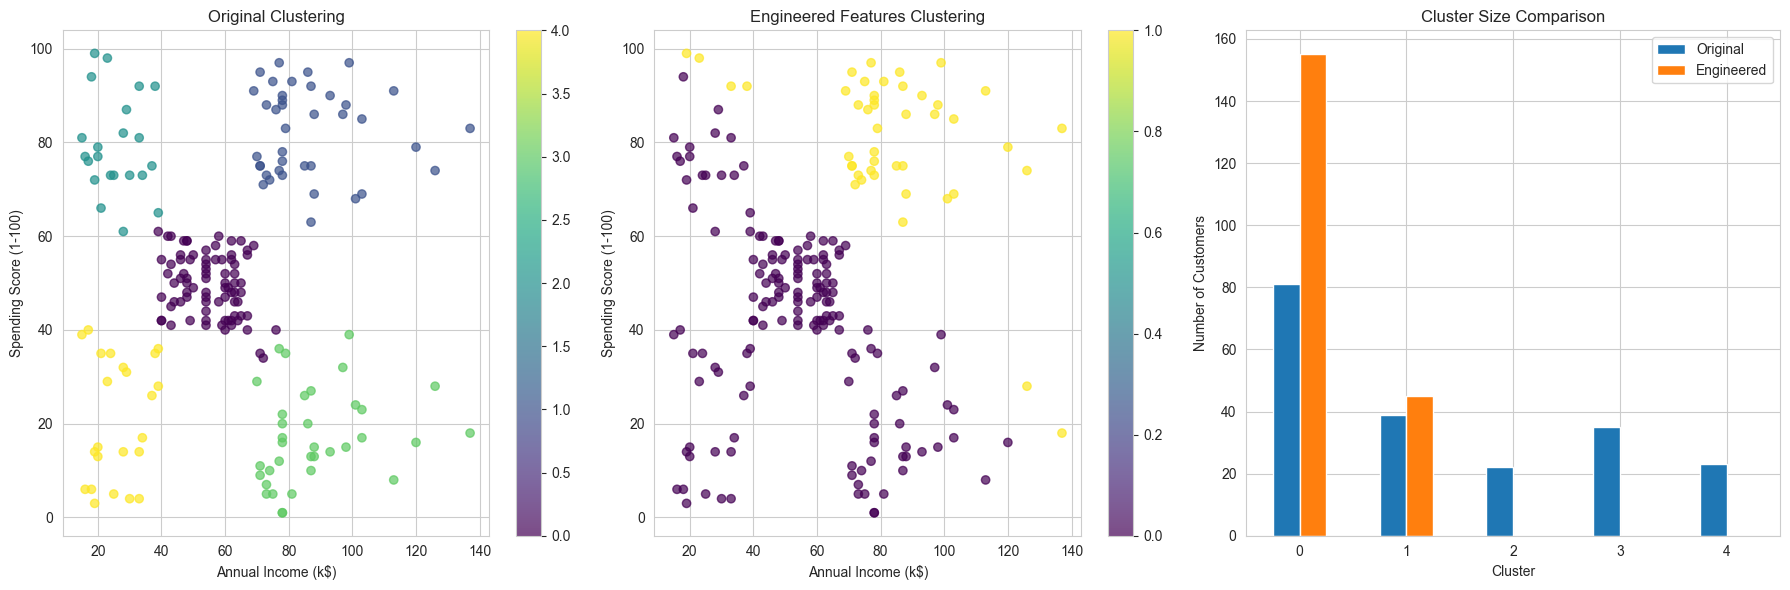

In [ ]:
# Compare with original clustering (if you have it)
if 'Income_Cluster' in df_engineered.columns:
    # Create comparison visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Original clustering
    scatter_orig = axes[0].scatter(df_engineered['Annual Income (k$)'], df_engineered['Spending Score (1-100)'],
                                   c=df_engineered['Income_Cluster'], cmap='viridis', alpha=0.7)
    axes[0].set_xlabel('Annual Income (k$)')
    axes[0].set_ylabel('Spending Score (1-100)')
    axes[0].set_title('Original Clustering')
    plt.colorbar(scatter_orig, ax=axes[0])

    # Engineered clustering
    scatter_eng = axes[1].scatter(df_engineered['Annual Income (k$)'], df_engineered['Spending Score (1-100)'],
                                  c=df_engineered['Engineered_Cluster'], cmap='viridis', alpha=0.7)
    axes[1].set_xlabel('Annual Income (k$)')
    axes[1].set_ylabel('Spending Score (1-100)')
    axes[1].set_title('Engineered Features Clustering')
    plt.colorbar(scatter_eng, ax=axes[1])

    # Side-by-side comparison
    comparison_data = pd.DataFrame({
        'Original': df_engineered['Income_Cluster'].value_counts().sort_index(),
        'Engineered': df_engineered['Engineered_Cluster'].value_counts().sort_index()
    })
    comparison_data.plot(kind='bar', ax=axes[2])
    axes[2].set_title('Cluster Size Comparison')
    axes[2].set_xlabel('Cluster')
    axes[2].set_ylabel('Number of Customers')
    axes[2].legend()
    axes[2].tick_params(axis='x', rotation=0)

    plt.tight_layout()
    plt.show()

##### Step 9: Create Customer Personas from Engineered Clusters

In [ ]:
# Analyze each cluster to create customer personas
print("=" * 60)
print("CUSTOMER PERSONAS FROM ENGINEERED CLUSTERING")
print("=" * 60)

for cluster_id in sorted(df_engineered['Engineered_Cluster'].unique()):
    cluster_data = df_engineered[df_engineered['Engineered_Cluster'] == cluster_id]

    print(f"\nCluster {cluster_id} - {len(cluster_data)} customers ({len(cluster_data)/len(df_engineered)*100:.1f}%)")
    print("-" * 50)

    # Calculate cluster characteristics
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    avg_age = cluster_data['Age'].mean()
    avg_spending_power = cluster_data['Spending_Power_Index'].mean()
    avg_value_score = cluster_data['Value_Customer_Score'].mean()

    print(f"Average Income: ${avg_income:.0f}k")
    print(f"Average Spending Score: {avg_spending:.1f}")
    print(f"Average Age: {avg_age:.1f}")
    print(f"Average Spending Power Index: {avg_spending_power:.1f}")
    print(f"Average Value Customer Score: {avg_value_score:.1f}")

    # Gender distribution
    gender_dist = cluster_data['Gender'].value_counts(normalize=True) * 100
    print(f"Gender Distribution: {gender_dist.to_dict()}")

    # Age group distribution
    age_dist = cluster_data['Age_Group'].value_counts()
    print(f"Age Groups: {age_dist.to_dict()}")

    # Create persona description
    if avg_income > 70 and avg_spending > 60:
        persona = "High-Value Premium Customer"
    elif avg_income < 40 and avg_spending > 70:
        persona = "High-Spending Budget Customer"
    elif avg_income > 60 and avg_spending < 40:
        persona = "High-Income Conservative Spender"
    elif avg_age > 50:
        persona = "Mature Customer"
    else:
        persona = "Balanced Customer"

    print(f"Persona: {persona}")

CUSTOMER PERSONAS FROM ENGINEERED CLUSTERING

Cluster 0 - 155 customers (77.5%)
--------------------------------------------------
Average Income: $54k
Average Spending Score: 41.4
Average Age: 40.7
Average Spending Power Index: 46.4
Average Value Customer Score: 80.7
Gender Distribution: {'Female': 56.774193548387096, 'Male': 43.225806451612904}
Age Groups: {'Mature (46-55)': 37, 'Young (≤25)': 36, 'Senior (>55)': 29, 'Young Adult (26-35)': 28, 'Middle Age (36-45)': 25}
Persona: Balanced Customer

Cluster 1 - 45 customers (22.5%)
--------------------------------------------------
Average Income: $83k
Average Spending Score: 80.7
Average Age: 32.5
Average Spending Power Index: 81.7
Average Value Customer Score: 141.5
Gender Distribution: {'Female': 53.333333333333336, 'Male': 46.666666666666664}
Age Groups: {'Young Adult (26-35)': 32, 'Middle Age (36-45)': 11, 'Young (≤25)': 2}
Persona: High-Value Premium Customer


##### Step 10: Business Insights and Recommendations

In [ ]:
# Generate business insights
print("=" * 60)
print("BUSINESS INSIGHTS AND RECOMMENDATIONS")
print("=" * 60)

# Calculate cluster profitability potential
cluster_analysis = df_engineered.groupby('Engineered_Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Value_Customer_Score': 'mean',
    'Spending_Power_Index': 'mean'
}).round(2)

# Add customer count
cluster_analysis['Customer_Count'] = df_engineered['Engineered_Cluster'].value_counts().sort_index()
cluster_analysis['Percentage'] = (cluster_analysis['Customer_Count'] / len(df_engineered) * 100).round(1)

print("Cluster Analysis Summary:")
print(cluster_analysis)

# Identify high-priority clusters
high_value_clusters = cluster_analysis[cluster_analysis['Value_Customer_Score'] > cluster_analysis['Value_Customer_Score'].mean()]
print(f"\nHigh-Value Clusters (above average): {high_value_clusters.index.tolist()}")

# Marketing recommendations
print("\nMarketing Recommendations:")
for cluster_id in sorted(df_engineered['Engineered_Cluster'].unique()):
    cluster_data = df_engineered[df_engineered['Engineered_Cluster'] == cluster_id]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    avg_age = cluster_data['Age'].mean()

    if avg_income > 70 and avg_spending > 60:
        recommendation = "Premium targeting - luxury products, VIP services"
    elif avg_income < 40 and avg_spending > 70:
        recommendation = "Value-focused marketing - deals, discounts"
    elif avg_income > 60 and avg_spending < 40:
        recommendation = "Conservative approach - quality over quantity"
    elif avg_age > 50:
        recommendation = "Mature market - comfort, reliability focus"
    else:
        recommendation = "Balanced approach - variety, innovation"

    print(f"Cluster {cluster_id}: {recommendation}")

BUSINESS INSIGHTS AND RECOMMENDATIONS
Cluster Analysis Summary:
                    Annual Income (k$)  Spending Score (1-100)  \
Engineered_Cluster                                               
0                                53.94                   41.35   
1                                83.36                   80.67   

                    Value_Customer_Score  Spending_Power_Index  \
Engineered_Cluster                                               
0                                  80.73                 46.39   
1                                 141.51                 81.74   

                    Customer_Count  Percentage  
Engineered_Cluster                              
0                              155        77.5  
1                               45        22.5  

High-Value Clusters (above average): [1]

Marketing Recommendations:
Cluster 0: Balanced approach - variety, innovation
Cluster 1: Premium targeting - luxury products, VIP services
